In [1]:
# # Basic Feature Extraction
# freq_q1 = frequency of Q1
# freq_q2 = frequency of Q2
# q1Len , q2Len = length of Q's
# wordsQ1 , wordsQ2 = number of words in Q's
# wordCommon = number of common unique words in Q's
# wordTotal = number of words in Q's
# wordShare = wordCommon/wordTotal
# SumFreq = Sum of freq_q1 + freq_q2
# FreqDiff = diff btw Q1 , Q2


In [2]:
import warnings
warnings.filterwarnings("ignore")
import os
from os import path
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("train.csv")
df = df.fillna('')
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [4]:
# freq_q1 = frequency of Q1
# freq_q2 = frequency of Q2
df["freq_q1"] = df.groupby('qid1')['qid1'].transform("count")
df["freq_q2"] = df.groupby('qid2')['qid2'].transform("count")

In [5]:
# q1Len , q2Len = length of Q's
df['q1Len'] = df["question1"].str.len()
df['q2Len'] = df["question2"].str.len()

In [6]:
# wordsQ1 , wordsQ2 = number of words in Q's
df['wordQ1'] = df['question1'].apply(lambda row: len(row.split(" ")))
df['wordQ2'] = df['question2'].apply(lambda row: len(row.split(" ")))

In [7]:
# wordCommon = number of common unique words in Q's
def normalized_word_common(row):
    w1 = set(map(lambda word : word.lower().strip(), row['question1'].split(' ')))
    w2 = set(map(lambda word : word.lower().strip(), row['question2'].split(' ')))
    return 1.0 * len(w1 & w2)
df['wordCommon'] = df.apply(normalized_word_common , axis = 1)

In [8]:
# wordTotal = number of words in Q's
def normalized_word_total(row):
    w1 = set(map(lambda word : word.lower().strip(), row['question1'].split(' ')))
    w2 = set(map(lambda word : word.lower().strip(), row['question2'].split(' ')))
    return 1.0 * (len(w1) + len(w2))
df['wordTotal'] = df.apply(normalized_word_total , axis = 1)

In [9]:
# wordShare = wordCommon/wordTotal
def normalized_word_share(row):
    w1 = set(map(lambda word : word.lower().strip(), row['question1'].split(' ')))
    w2 = set(map(lambda word : word.lower().strip(), row['question2'].split(' ')))
    return 1.0 * len(w1 & w2)/(len(w1) + len(w2))
df['wordShare'] = df.apply(normalized_word_share , axis = 1)

In [10]:
# SumFreq = Sum of freq_q1 + freq_q2
df['freq_q1+q2'] = df['freq_q1'] + df['freq_q2']

In [11]:
# FreqDiff = diff btw Q1 , Q2
df['freq_q1-q2'] = abs(df['freq_q1'] - df['freq_q2'])

In [12]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,freq_q1,freq_q2,q1Len,q2Len,wordQ1,wordQ2,wordCommon,wordTotal,wordShare,freq_q1+q2,freq_q1-q2
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,1,1,66,57,14,12,10.0,23.0,0.434783,2,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,4,1,51,88,8,13,4.0,20.0,0.200000,5,3
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,1,1,73,59,14,10,4.0,24.0,0.166667,2,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,1,1,50,65,11,9,0.0,19.0,0.000000,2,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,3,1,76,39,13,7,2.0,20.0,0.100000,4,2


Minimum Char :  0
Maximum Char :  623
Avg Char :  59.53670879813995


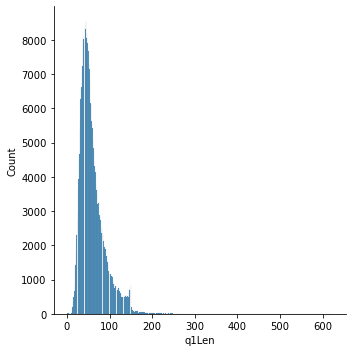

In [13]:
# Analysis of features
sns.displot(df['q1Len'])
print("Minimum Char : " , df['q1Len'].min())
print("Maximum Char : " , df['q1Len'].max())
print("Avg Char : " , df['q1Len'].mean())

Minimum Char :  0
Maximum Char :  1169
Avg Char :  60.10836528234683


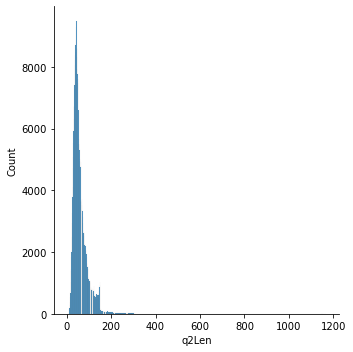

In [14]:
sns.displot(df['q2Len'])
print("Minimum Char : " , df['q2Len'].min())
print("Maximum Char : " , df['q2Len'].max())
print("Avg Char : " , df['q2Len'].mean())

Minimum word :  1
Maximum word :  125
Avg word :  10.94459175344431


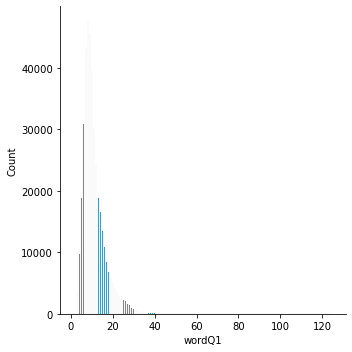

In [15]:
sns.displot(df['wordQ1'])
print("Minimum word : " , df['wordQ1'].min())
print("Maximum word : " , df['wordQ1'].max())
print("Avg word : " , df['wordQ1'].mean())

Minimum word :  1
Maximum word :  237
Avg word :  11.185119592371812


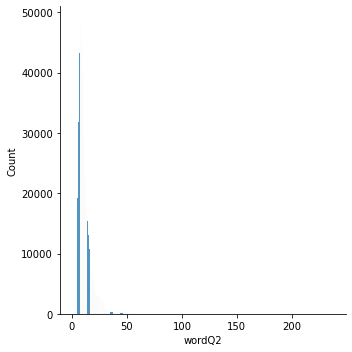

In [16]:
sns.displot(df['wordQ2'])
print("Minimum word : " , df['wordQ2'].min())
print("Maximum word : " , df['wordQ2'].max())
print("Avg word : " , df['wordQ2'].mean())

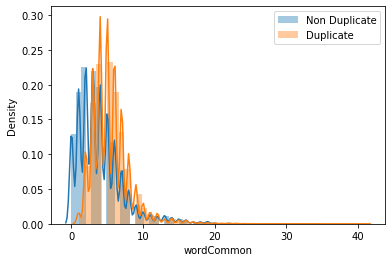

In [17]:
# Common Words
sns.distplot(df[df['is_duplicate'] == 0]['wordCommon'] , label = 'Non Duplicate')
sns.distplot(df[df['is_duplicate'] == 1]['wordCommon'] , label = 'Duplicate')
plt.legend()
plt.show()

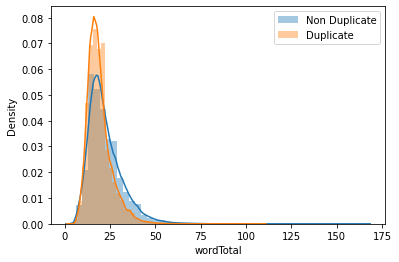

In [18]:
# Total Words
sns.distplot(df[df['is_duplicate'] == 0]['wordTotal'] , label = 'Non Duplicate')
sns.distplot(df[df['is_duplicate'] == 1]['wordTotal'] , label = 'Duplicate')
plt.legend()
plt.show()

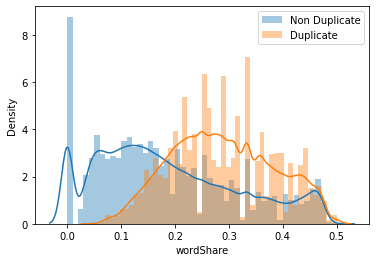

In [19]:
# Share Words
sns.distplot(df[df['is_duplicate'] == 0]['wordShare'] , label = 'Non Duplicate')
sns.distplot(df[df['is_duplicate'] == 1]['wordShare'] , label = 'Duplicate')
plt.legend()
plt.show()

In [20]:
new_df = df.sample(50000,random_state=2)
Q_df = new_df[['question1', 'question2']]
Q_df.head()


,question1,question2
398782,What is the best marketing automation tool for...,What is the best marketing automation tool for...
115086,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...
327711,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...
367788,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...
151235,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...


In [21]:
final_df = new_df.drop(columns=['id','qid1','qid2','question1','question2'])
print(final_df.shape)
print(final_df['is_duplicate'].value_counts())
final_df.head()

(50000, 12)
0    31601
1    18399
Name: is_duplicate, dtype: int64


,is_duplicate,freq_q1,freq_q2,q1Len,q2Len,wordQ1,wordQ2,wordCommon,wordTotal,wordShare,freq_q1+q2,freq_q1-q2
398782,1,1,1,76,77,12,12,11.0,24.0,0.458333,2,0
115086,0,1,1,49,57,12,15,7.0,23.0,0.304348,2,0
327711,0,1,1,105,120,25,17,2.0,34.0,0.058824,2,0
367788,0,1,2,59,146,12,30,0.0,32.0,0.000000,3,1
151235,0,3,2,35,50,5,9,3.0,13.0,0.230769,5,1


In [22]:
from sklearn.feature_extraction.text import CountVectorizer
# merge texts
questions = list(Q_df['question1']) + list(Q_df['question2'])

cv = CountVectorizer(max_features=3500)
q1_arr , q2_arr = np.vsplit(cv.fit_transform(questions).toarray(),2)

In [23]:
temp_df1 = pd.DataFrame(q1_arr , index = Q_df.index)
temp_df2 = pd.DataFrame(q2_arr , index = Q_df.index)
temp_df = pd.concat([temp_df1,temp_df2],axis = 1)
temp_df.shape

(50000, 7000)

In [24]:
final_df = pd.concat([final_df,temp_df],axis = 1)
print(final_df.shape)
final_df.head()

(50000, 7012)


,is_duplicate,freq_q1,freq_q2,q1Len,q2Len,wordQ1,wordQ2,wordCommon,wordTotal,wordShare,...,3490,3491,3492,3493,3494,3495,3496,3497,3498,3499
398782,1,1,1,76,77,12,12,11.0,24.0,0.458333,...,0,0,0,0,0,0,0,0,0,0
115086,0,1,1,49,57,12,15,7.0,23.0,0.304348,...,0,0,0,0,0,0,0,0,0,0
327711,0,1,1,105,120,25,17,2.0,34.0,0.058824,...,0,0,0,0,0,0,0,0,0,0
367788,0,1,2,59,146,12,30,0.0,32.0,0.000000,...,0,1,0,0,0,0,0,0,0,0
151235,0,3,2,35,50,5,9,3.0,13.0,0.230769,...,0,0,0,0,0,0,0,0,0,0


In [30]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(final_df.iloc[:,1:].values,
                                                       final_df.iloc[:,0].values,
                                                       test_size=0.2,random_state=1)

In [31]:
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.8038

In [32]:
confusion_matrix(y_test,y_pred)

array([[5788,  497],
       [1465, 2250]], dtype=int64)

In [33]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test)
accuracy_score(y_test,y_pred)

0.8133

In [34]:
confusion_matrix(y_test,y_pred)

array([[5565,  720],
       [1147, 2568]], dtype=int64)